In [9]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
import uncertainties
from uncertainties import unumpy as unp
import pickle

import os

import trackpy as tp
import av
import cv2
from skimage import io, color
from astropy.io import fits

import scipy
from scipy import stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

from numpy import unravel_index

In [10]:
frame_number = 150
r_real = 1e-6 # meter
r_pixel = 21 # pixel
conversion = r_real/r_pixel # meter per pixel
err = np.full((1, frame_number), 1.0*conversion)

In [11]:
file_H2O = np.array(['water_take2.avi','water_take3.avi','water_take4.avi'])
file_gly10 = np.array(['glycerol_10.avi','glycerol_10_take2.avi', 'glycerol_10_take3.avi'])
file_gly25 = np.array(['glycerol_25_take6.avi', 'glycerol_25_take5.avi', 'glycerol_10_take4.avi'])

In [16]:
def read_vid(filename, start_frame, frame_length):
    end_frame = start_frame + frame_length
    msd = np.array([])
    pos = []
    cap = cv2.VideoCapture(filename)
    if start_frame != 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    while cap.get(cv2.CAP_PROP_POS_FRAMES) < end_frame:  # Loop until the specified end frame is reached
        ret, frame = cap.read()
        if not ret:
            break
        img = frame  
        
        # Starts the calculation
        #print('frame:', int(cap.get(cv2.CAP_PROP_POS_FRAMES)))
        
        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        Max = np.max(gray)
        Max_i = unravel_index(gray.argmax(), gray.shape)

        pos.append([[[Max_i[1],  Max_i[0]]]])

        fig, ax = plt.subplots()
        plt.imshow(img, cmap='gray')
        circle = plt.Circle((Max_i[1],Max_i[0]), 20, color='r', fill=False)
        plt.gca().add_artist(circle)

        plt.colorbar()

    x = list(map(lambda x: x[0][0][0], pos))
    y = list(map(lambda x: x[0][0][1], pos))    

    x_m = np.array(x) * conversion
    y_m = np.array(y) * conversion

    x_new = unp.uarray(x_m, err)
    y_new = unp.uarray(y_m, err)

    return x, y, x_new, y_new#, ax

C:\Users\Amiti\AppData\Local\Temp\ipykernel_14468\1437503281.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


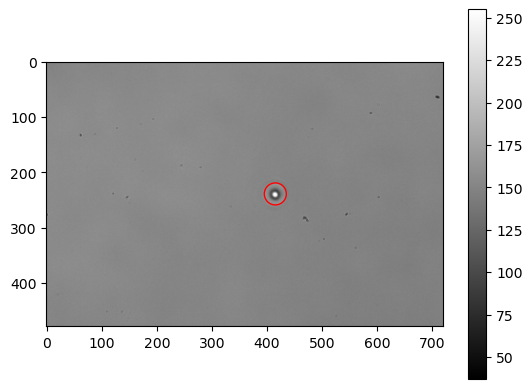

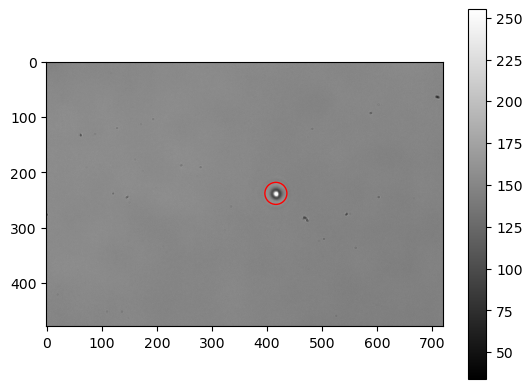

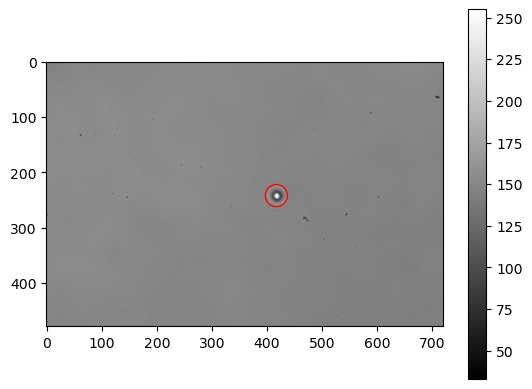

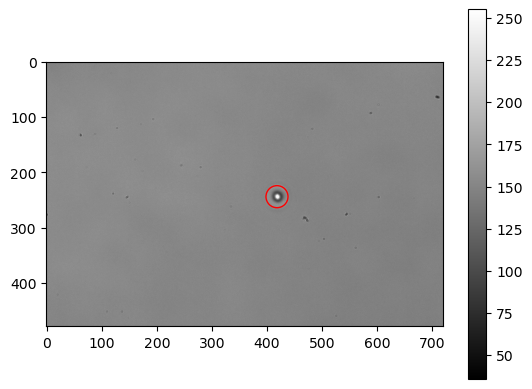

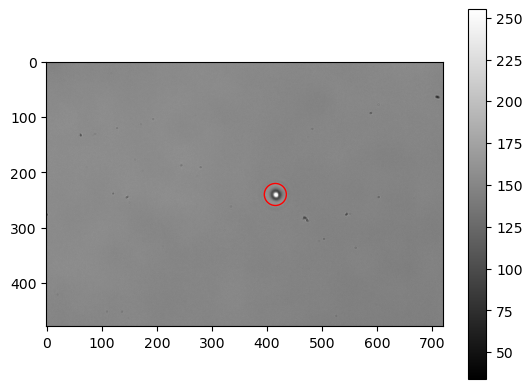

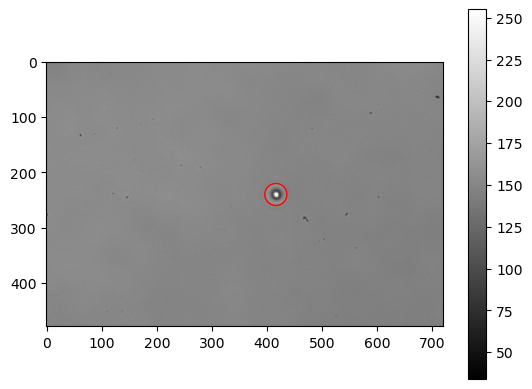

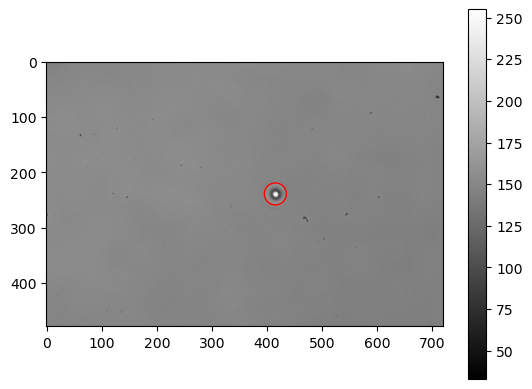

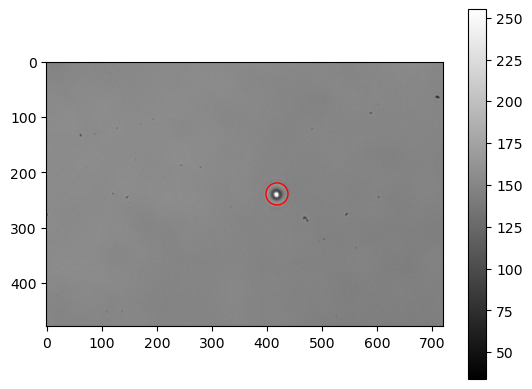

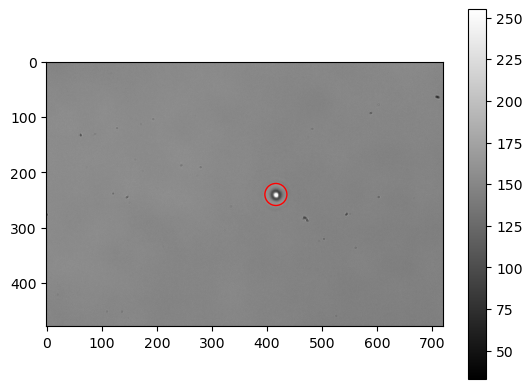

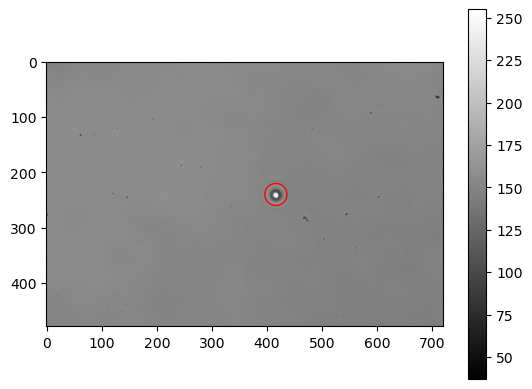

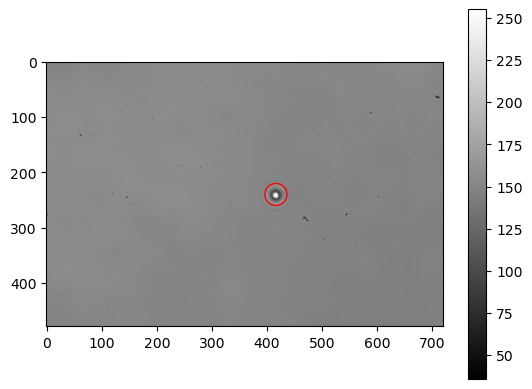

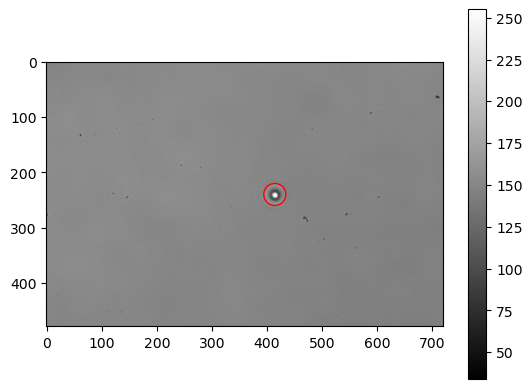

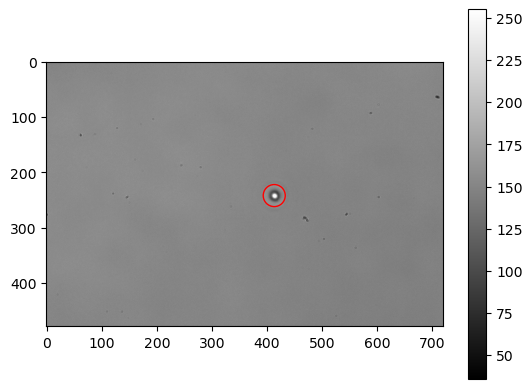

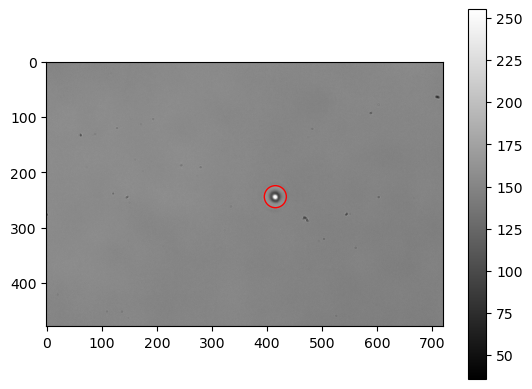

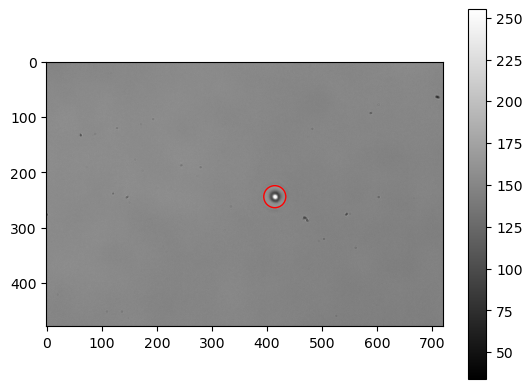

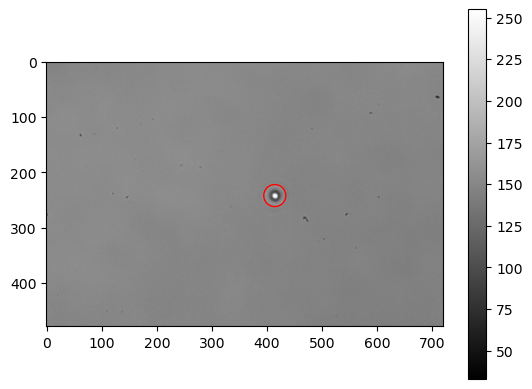

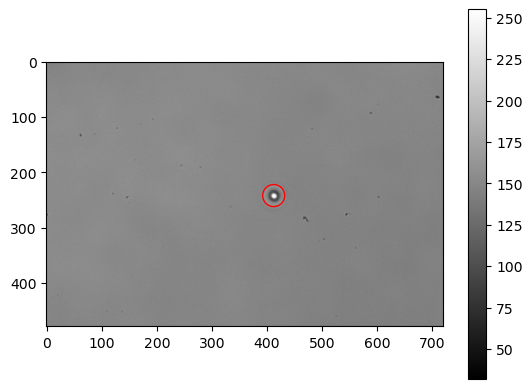

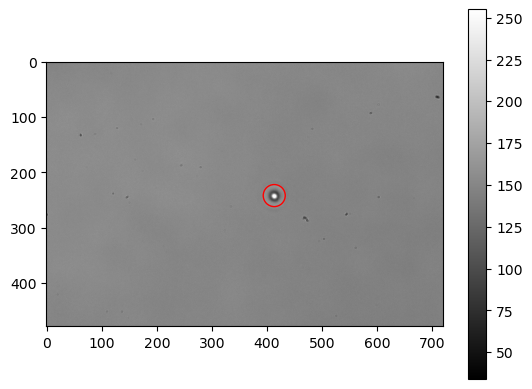

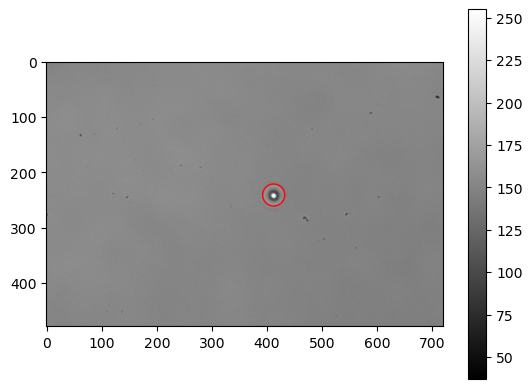

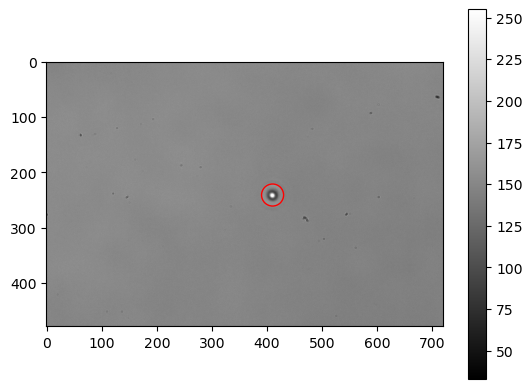

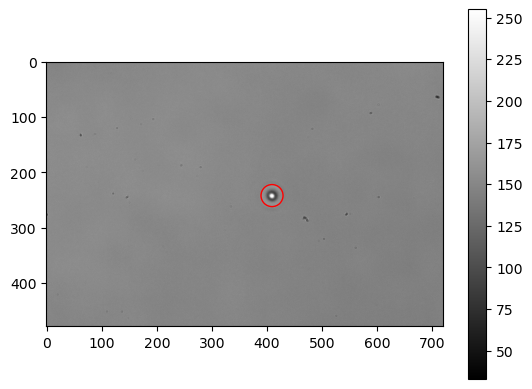

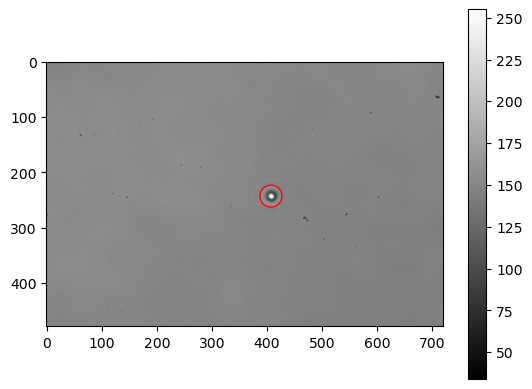

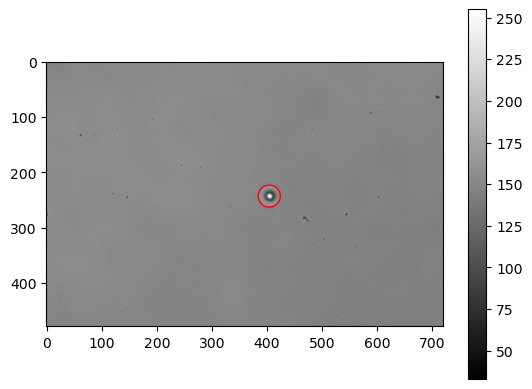

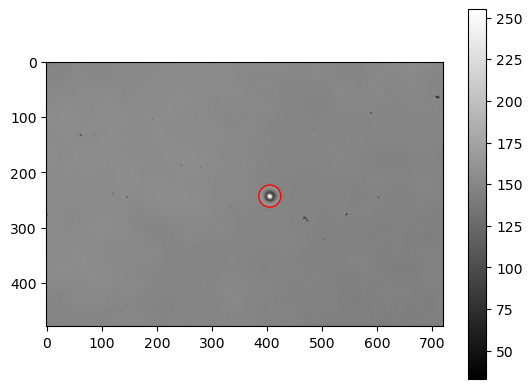

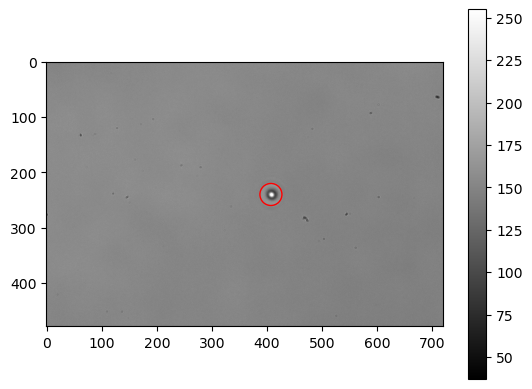

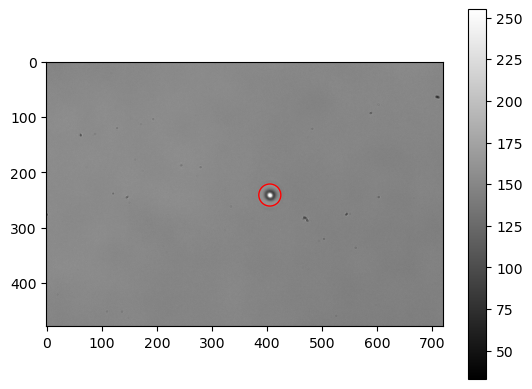

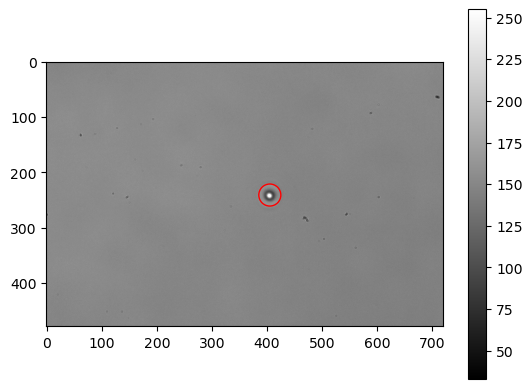

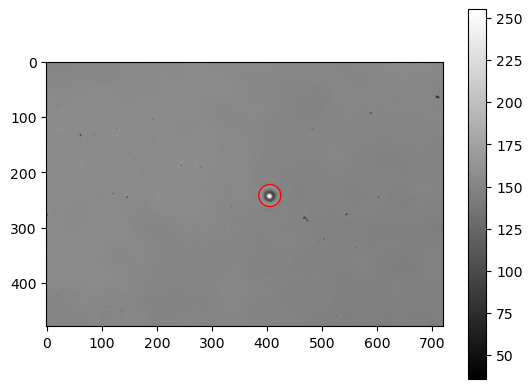

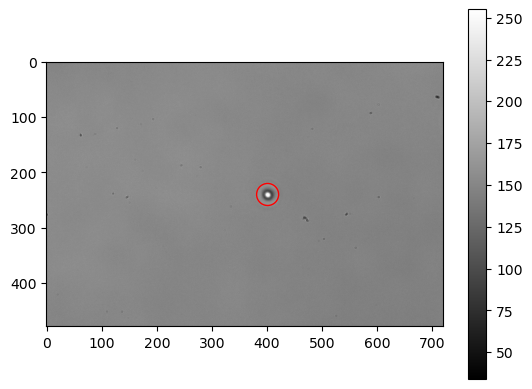

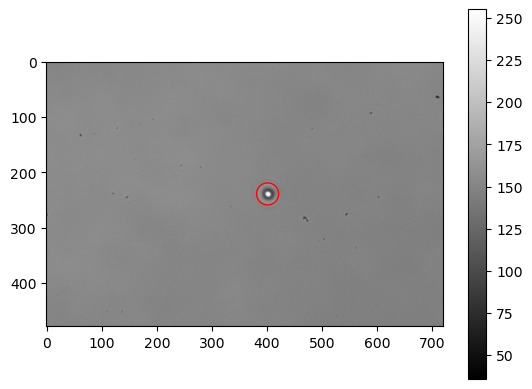

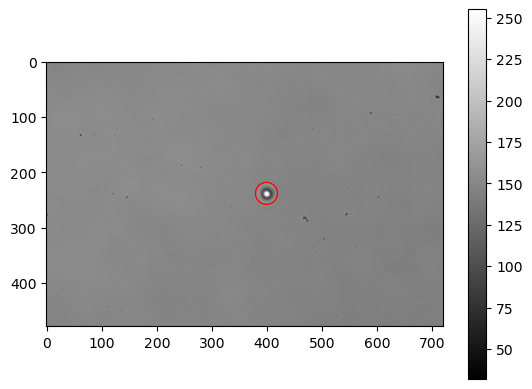

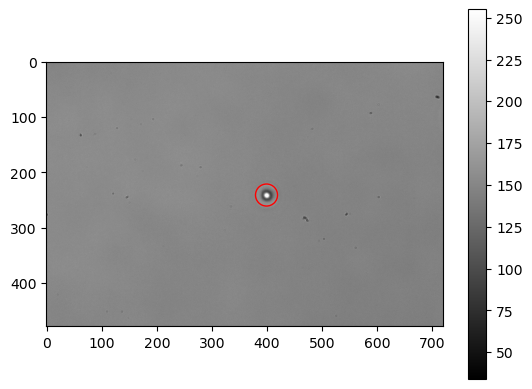

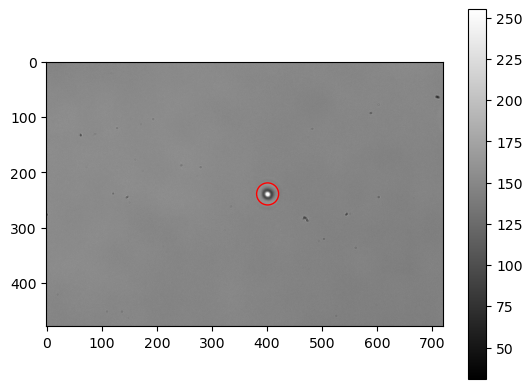

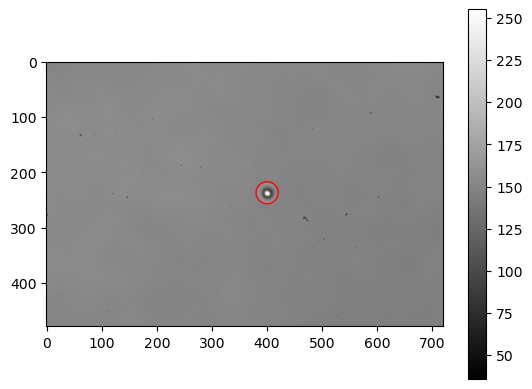

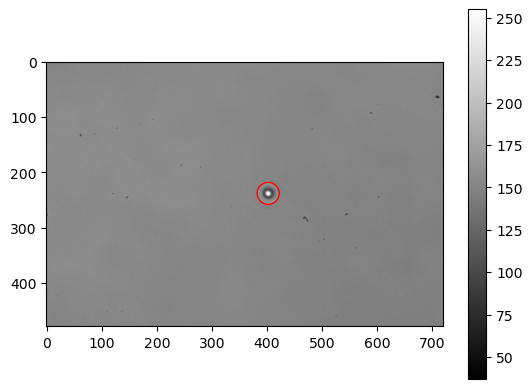

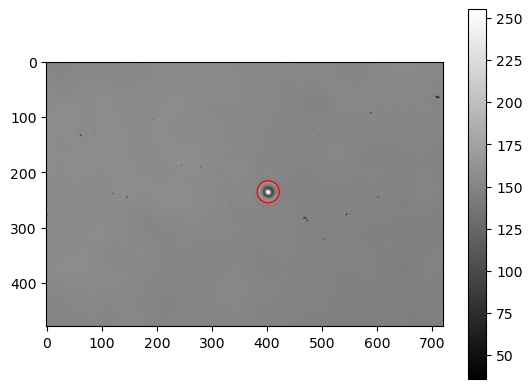

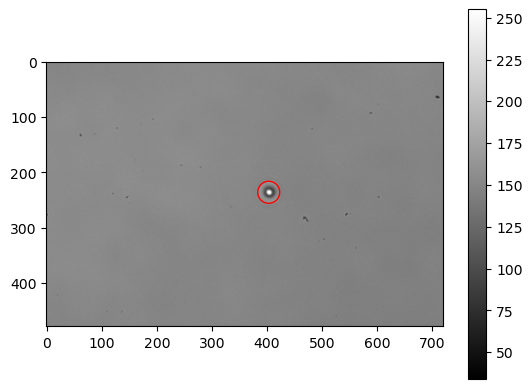

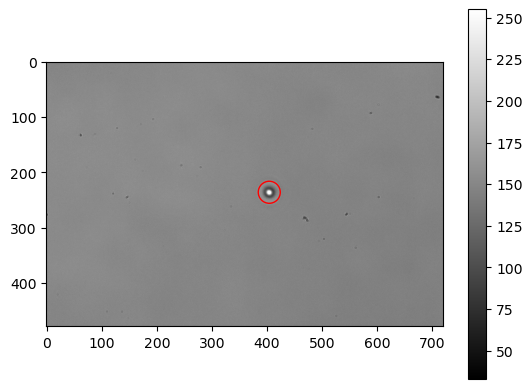

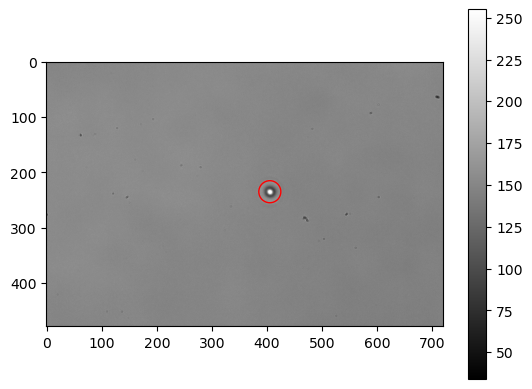

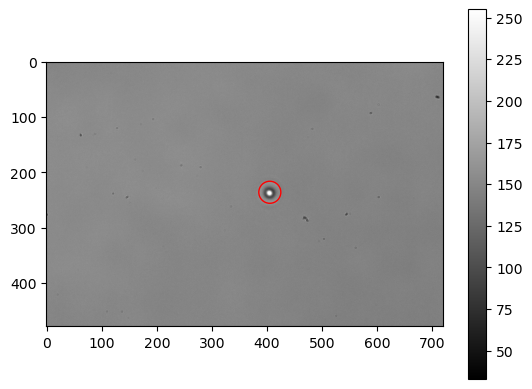

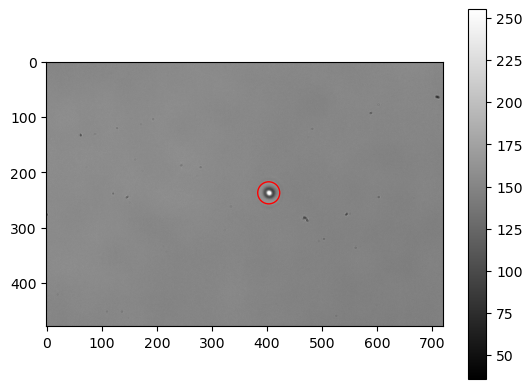

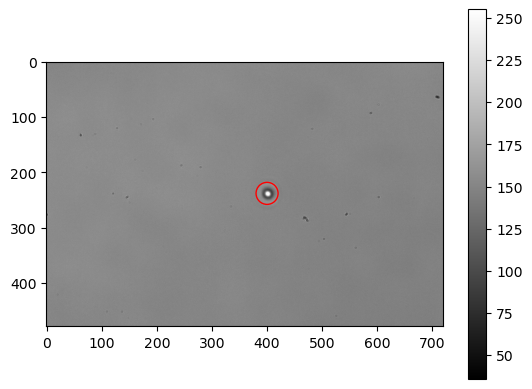

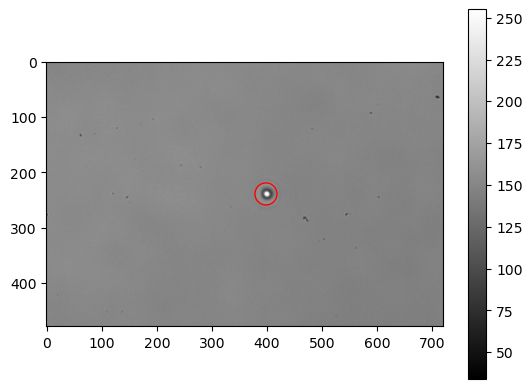

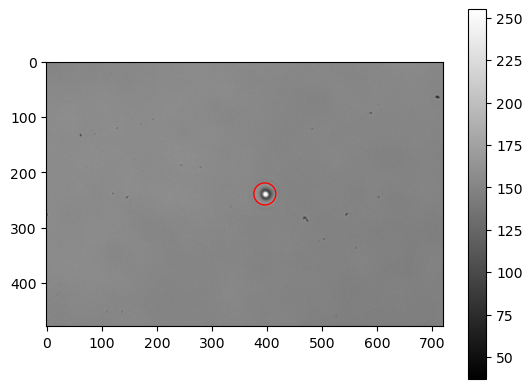

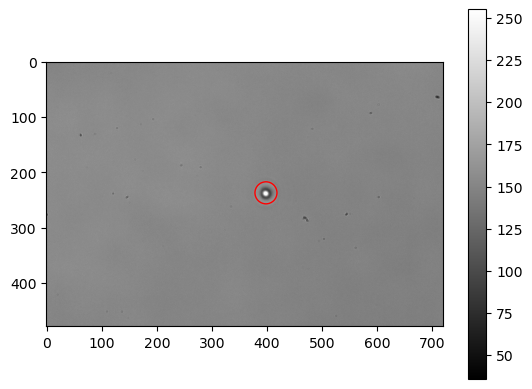

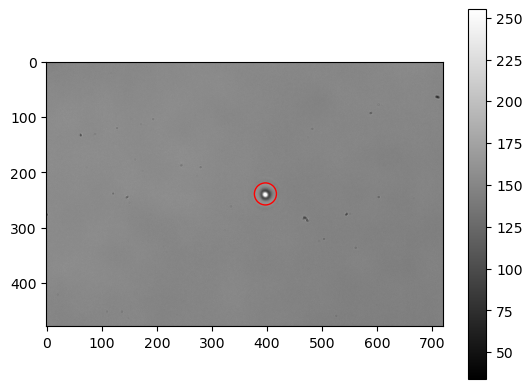

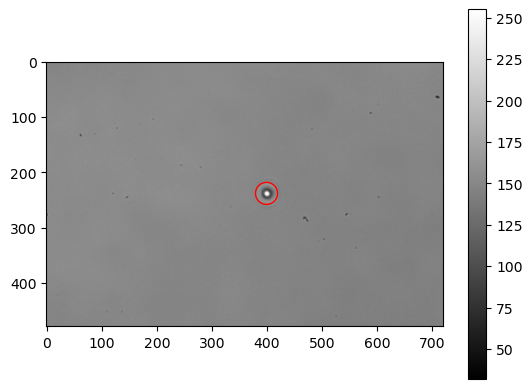

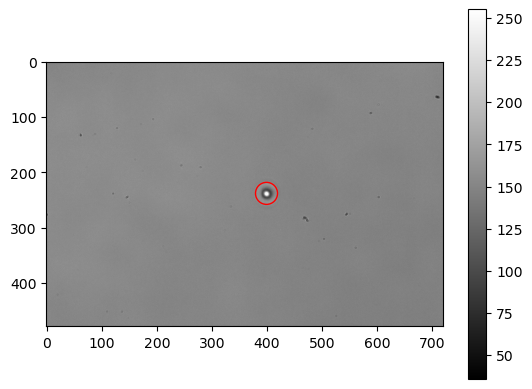

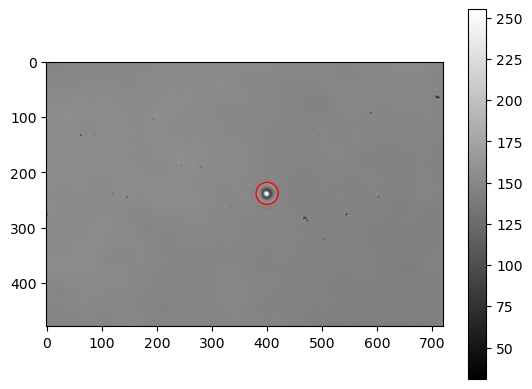

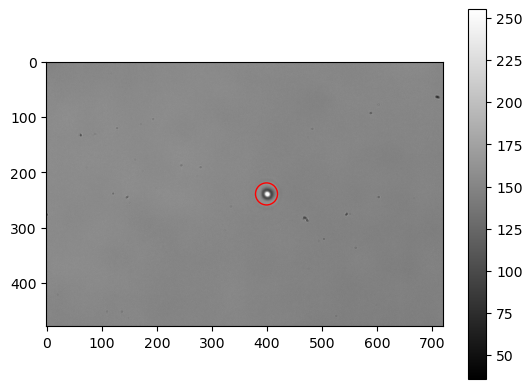

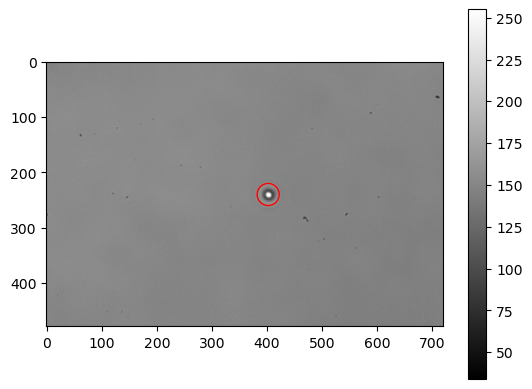

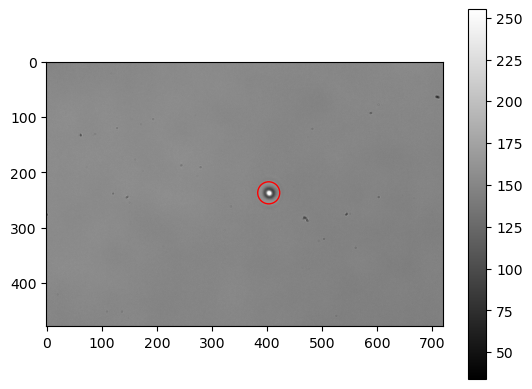

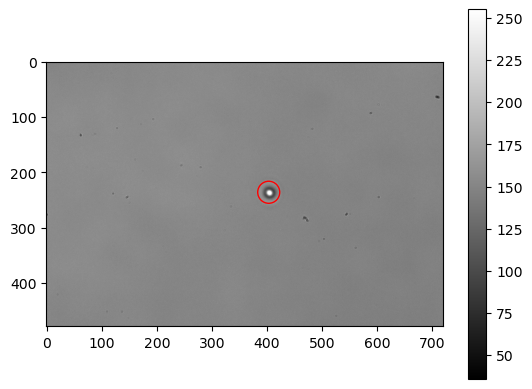

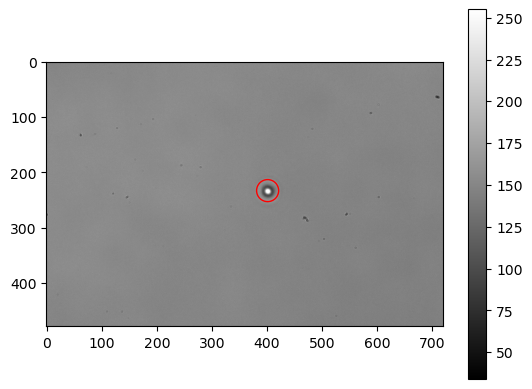

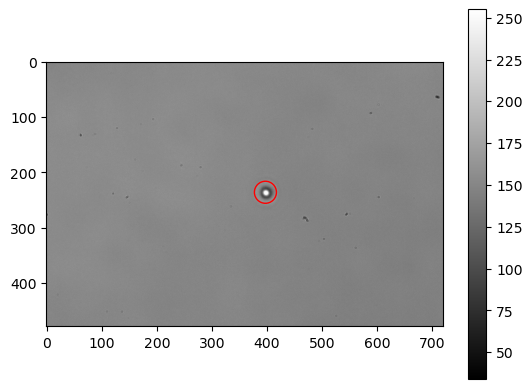

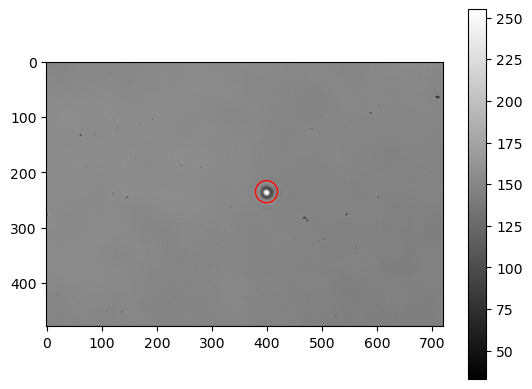

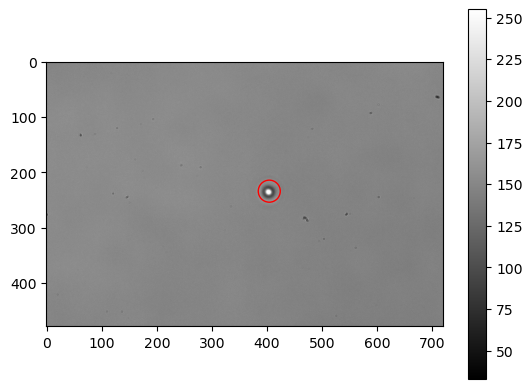

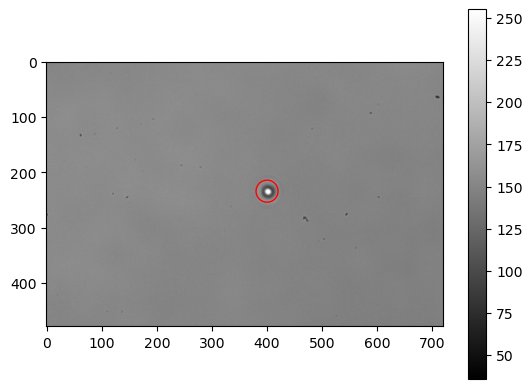

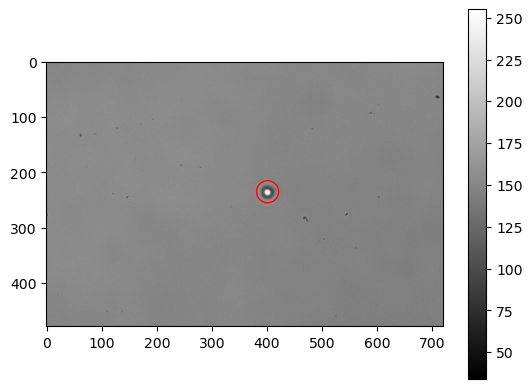

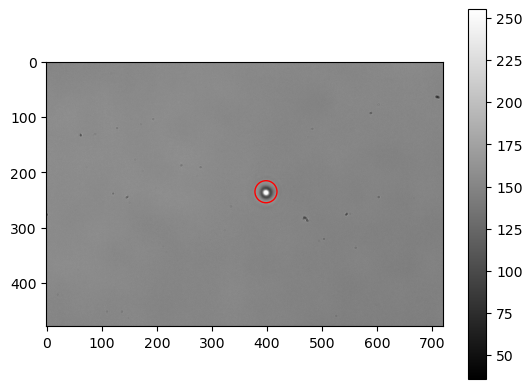

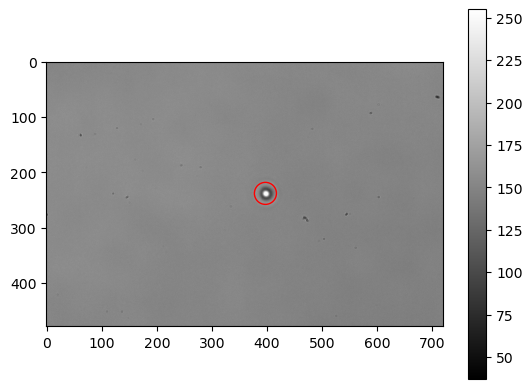

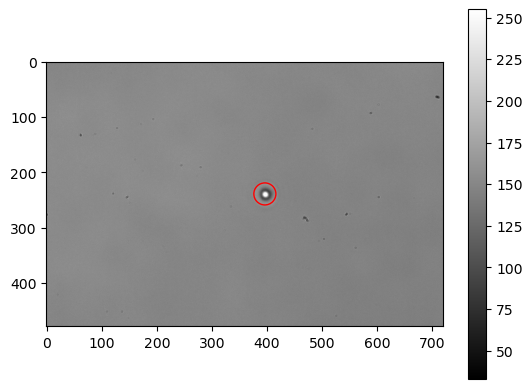

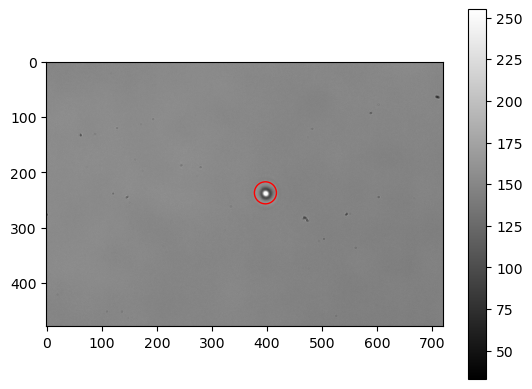

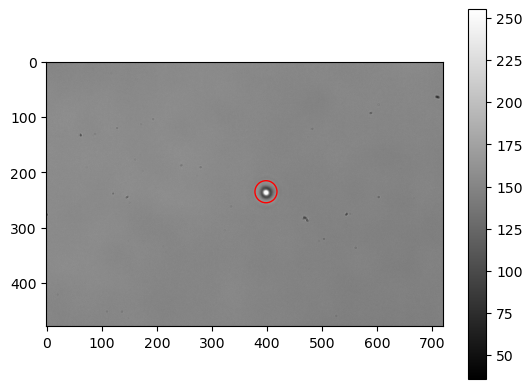

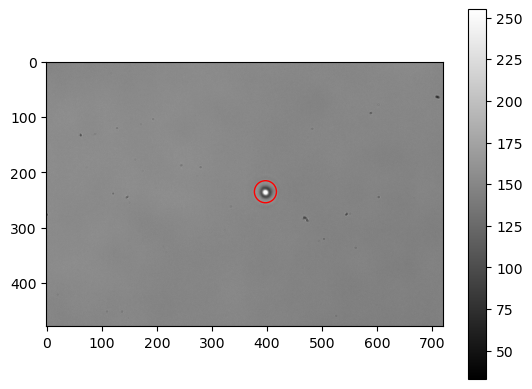

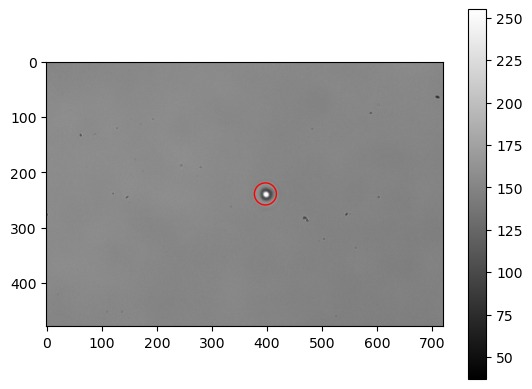

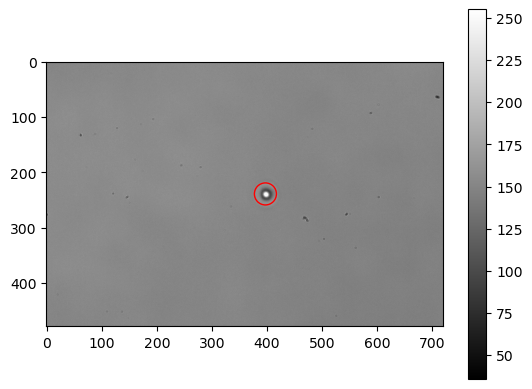

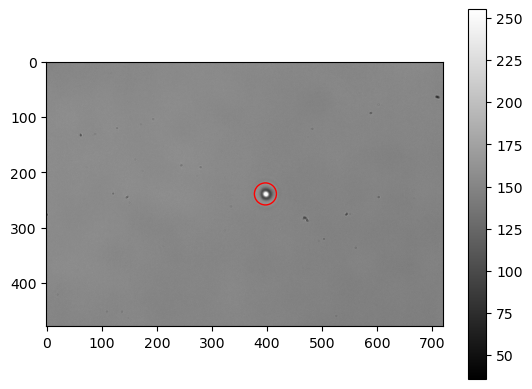

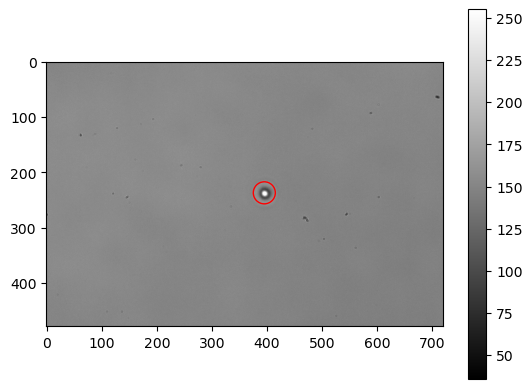

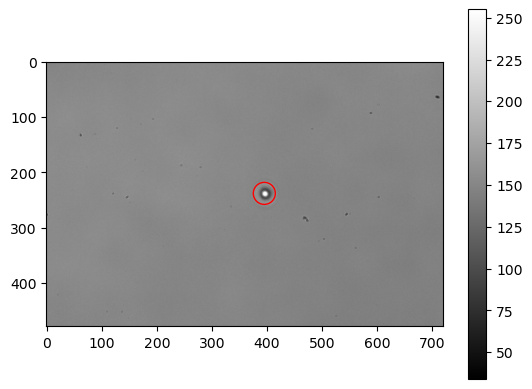

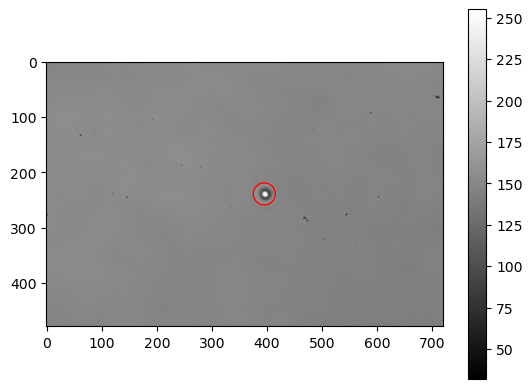

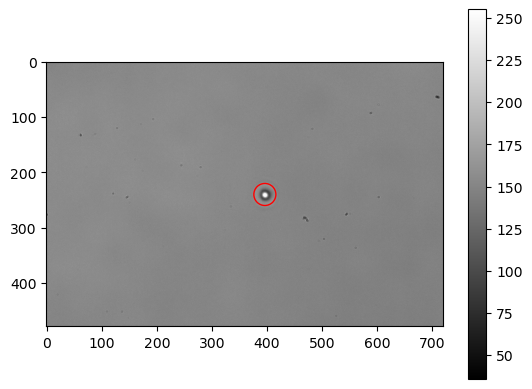

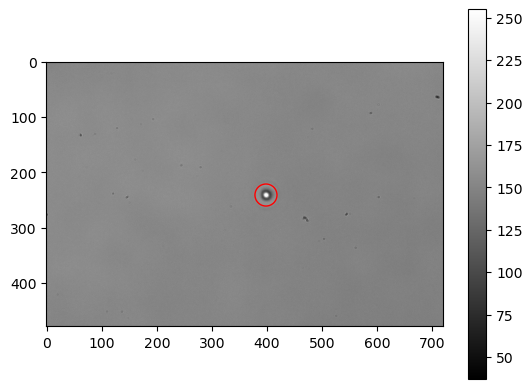

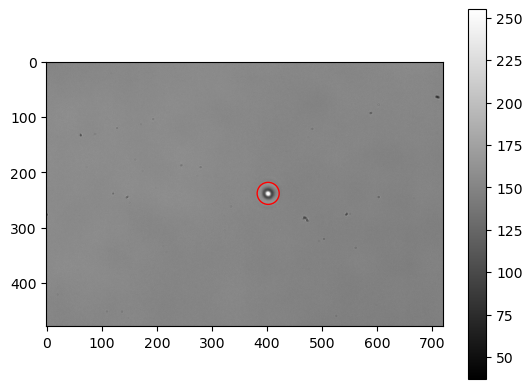

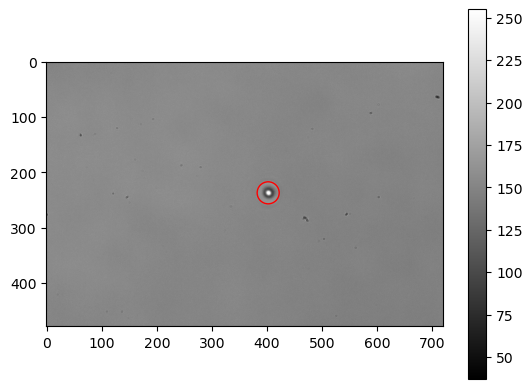

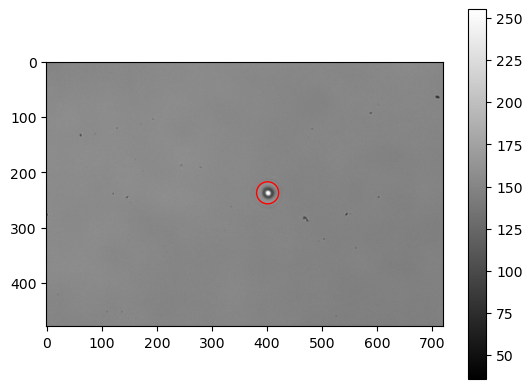

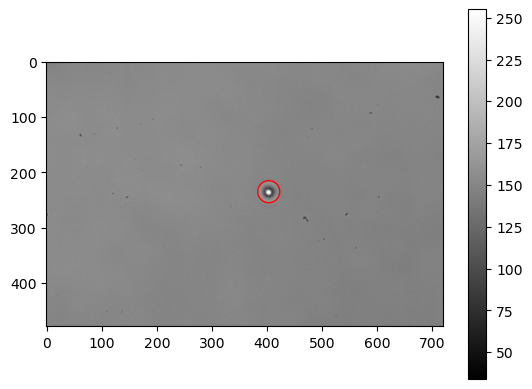

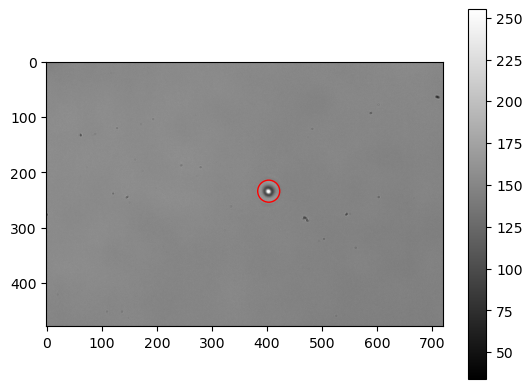

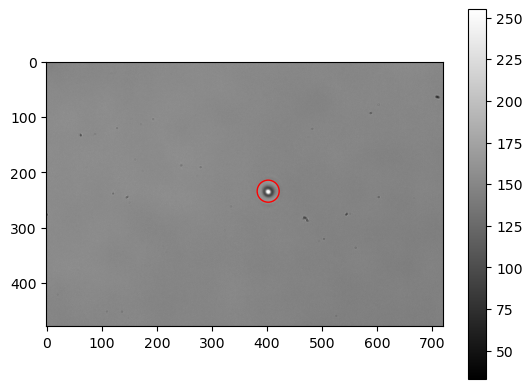

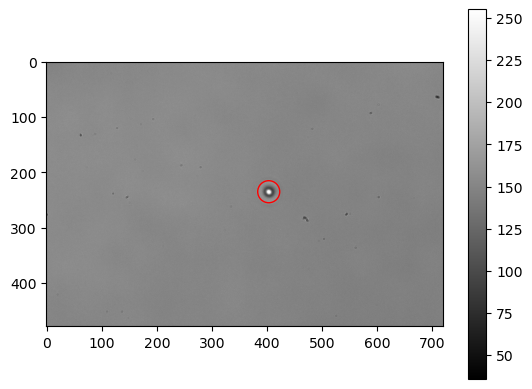

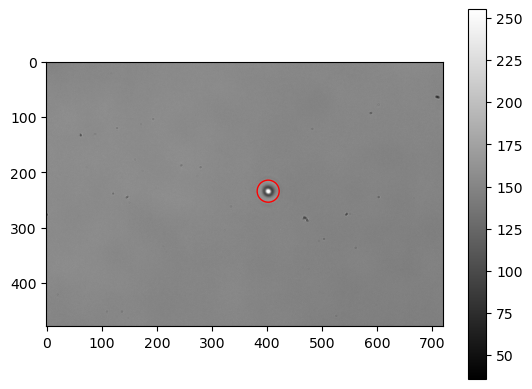

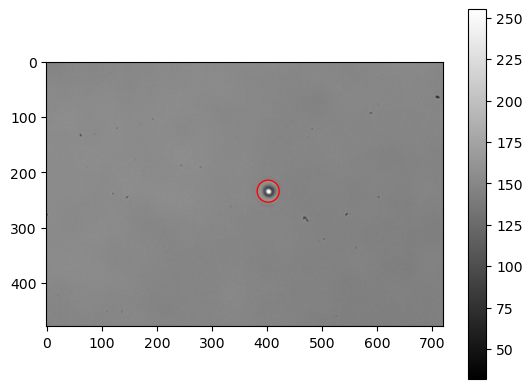

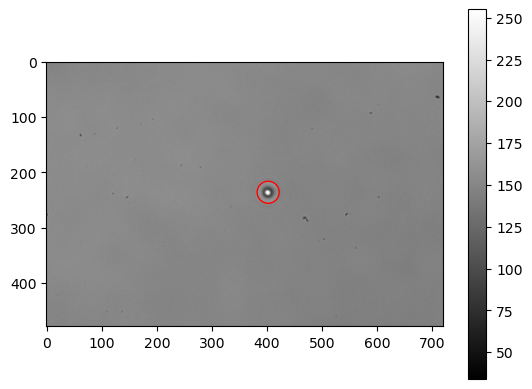

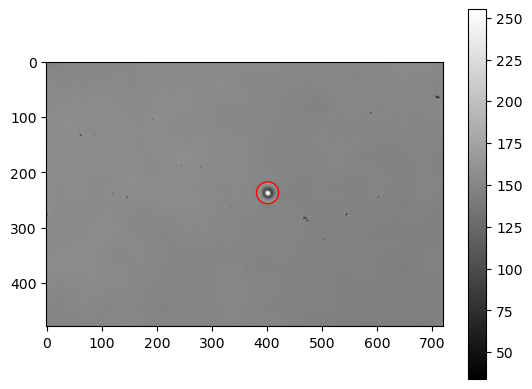

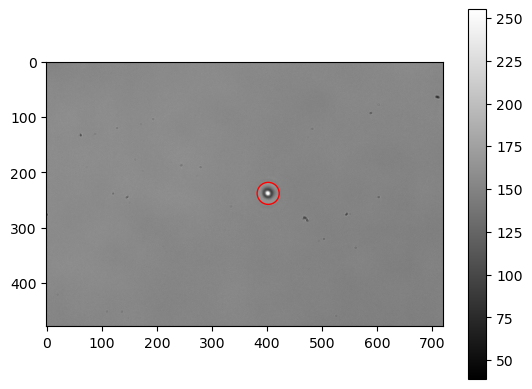

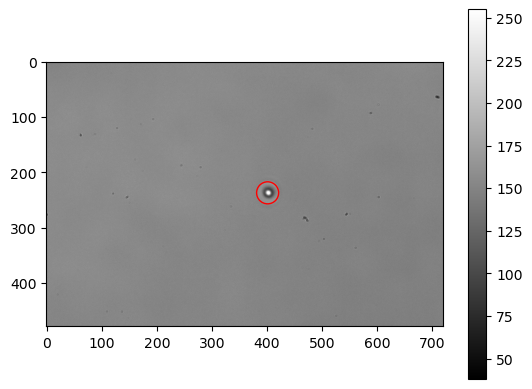

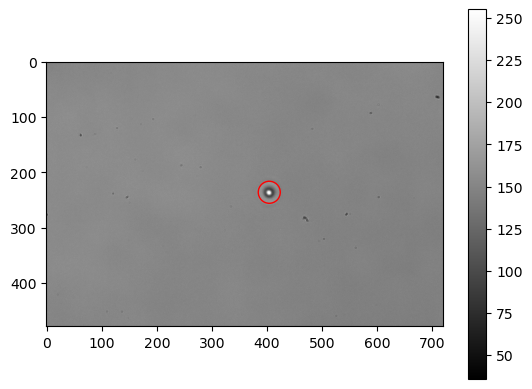

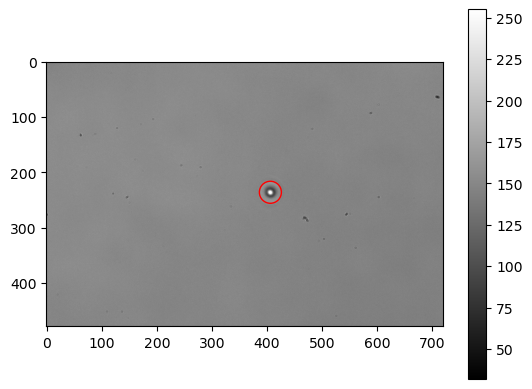

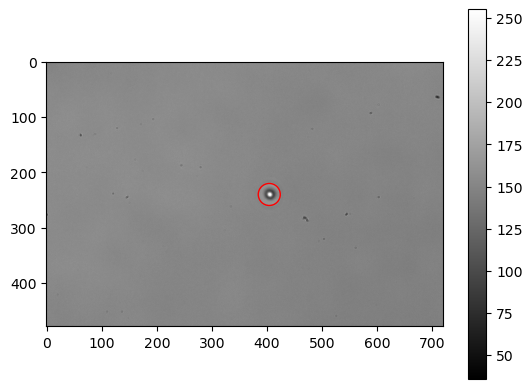

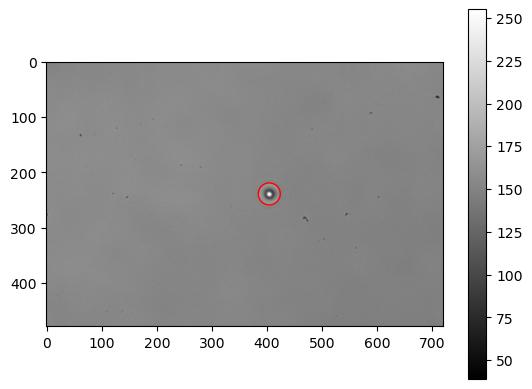

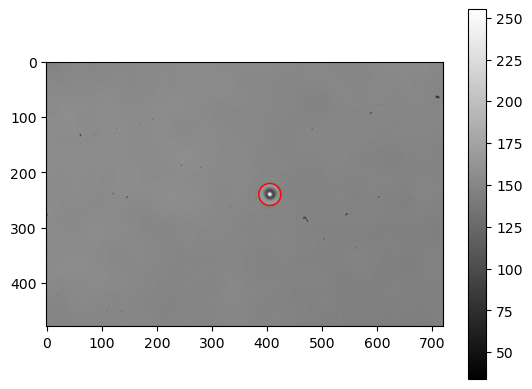

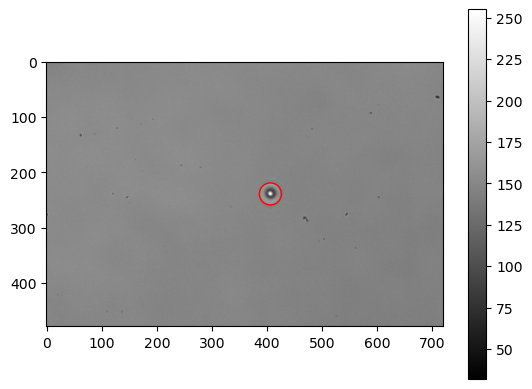

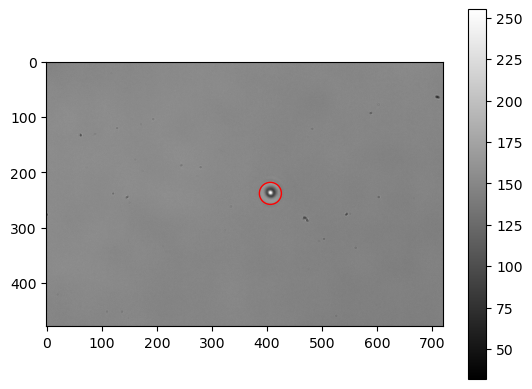

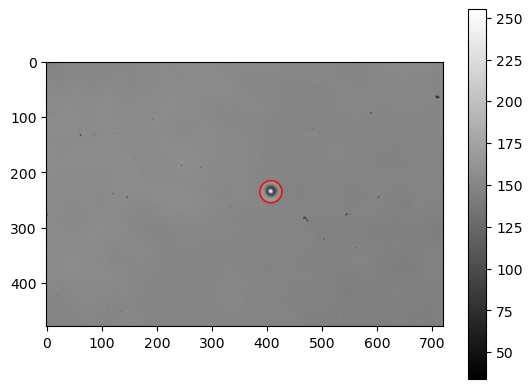

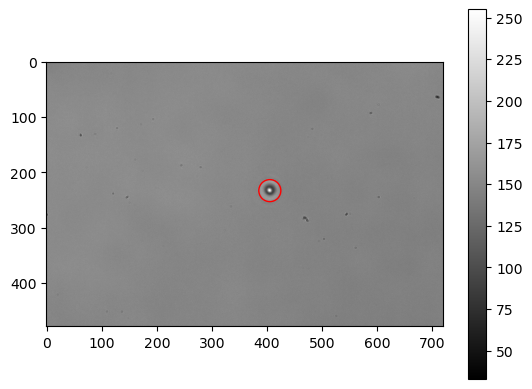

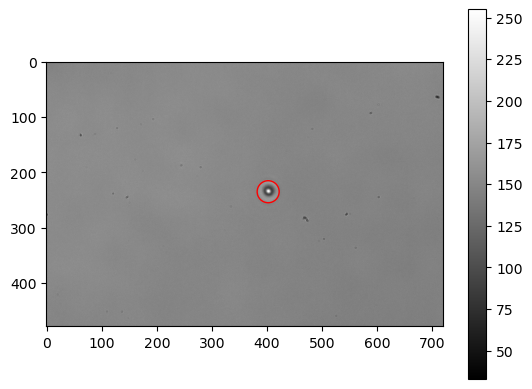

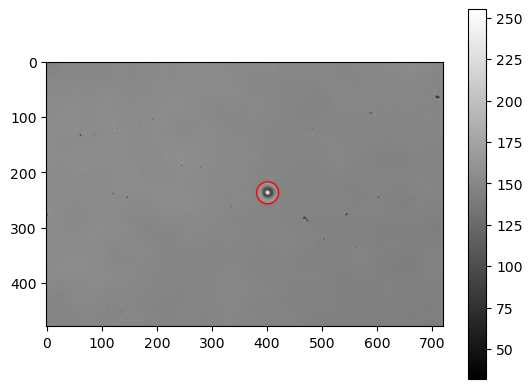

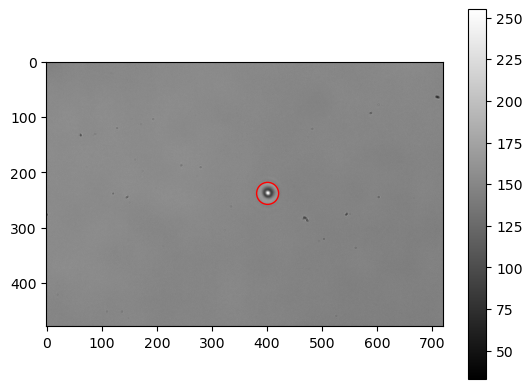

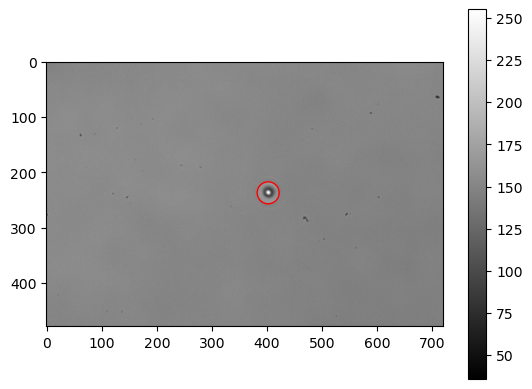

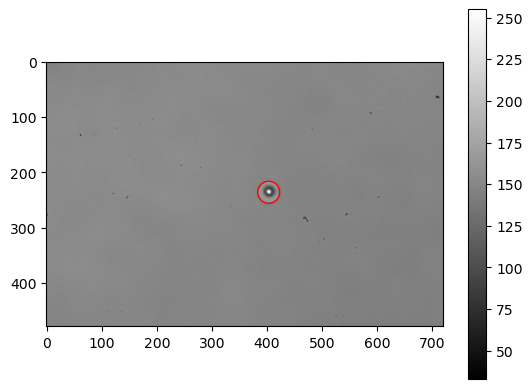

In [20]:
x_g10, y_g10, x_new_g10, y_new_g10 = read_vid(file_gly10[2], 700, 100)

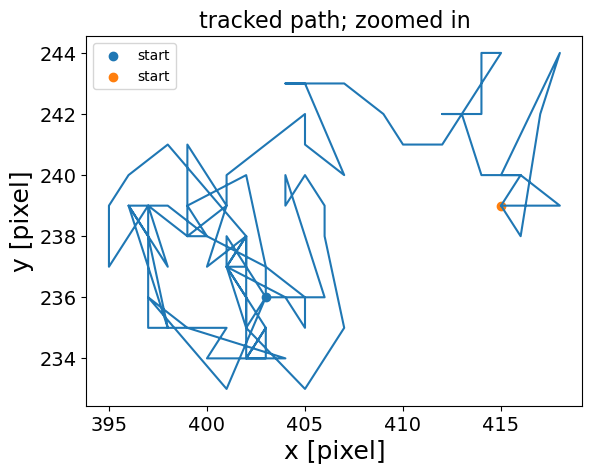

In [41]:
fig, ax = plt.subplots()
ax.set_title('tracked path; zoomed in', fontsize=16)
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14) 
ax.set_xlabel('x [pixel]', fontsize=18)
ax.set_ylabel('y [pixel]', fontsize=18)


ax.scatter(x_g10[-1], y_g10[-1], label='start')

ax.scatter(x_g10[0], y_g10[0], label='start')

plt.plot(x_g10, y_g10) # Check the tracked path
ax.legend()

In [42]:
# Save the array to a file using pickle
with open('glycerol10_test.pkl', 'wb') as f:
    pickle.dump((x_g10, y_g10), f)